# Layered Charts

A `LayeredChart` allows you to stack multiple individual charts on top of each other as layers. For example, this could be used to create a chart with both lines and points.

## Imports

In [1]:
import altair as alt
import pandas as pd
import numpy as np

## Data

In [2]:
data1 = pd.DataFrame({'x':np.random.rand(10), 'y':np.random.rand(10)})
data2 = pd.DataFrame({'x':np.random.rand(10), 'y':np.random.rand(10)})

In [3]:
data1.head()

,x,y
0,0.411848,0.465071
1,0.622785,0.241769
2,0.169281,0.727634
3,0.548550,0.316740
4,0.584138,0.714337


## Layered charts

If all layers will use the same data, you can create a `LayeredChart` with the data:

In [4]:
chart = alt.LayeredChart(data1)

Layers are then added to the chart by creating individual `Chart` instances (with marks and encoding) and adding them to the `LayeredChart` using the `+=` operator:

In [5]:
l1 = alt.Chart().mark_line().encode(x='x:Q', y='y:Q')
l2 = alt.Chart().mark_point().encode(x='x:Q', y='y:Q')

In [6]:
chart += l1
chart += l2

The layers are stored as a list under the `layers` attribute:

In [7]:
chart.layers

Displaying the chart will automatically combine the different layers into a single chart, with the appropriate axes:

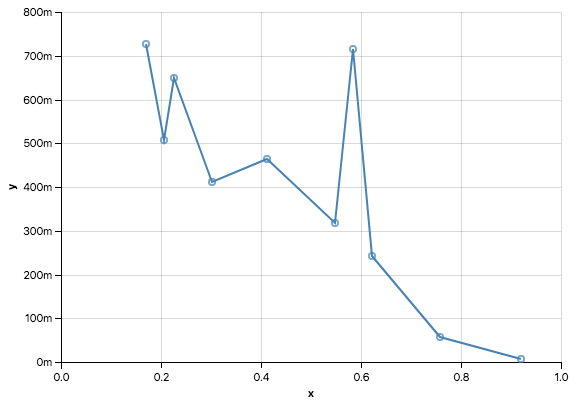

In [8]:
chart

If each chart has its own data, you can create individual `Chart` objects, each with their own data, and them simply add them together:

In [9]:
chart2 = alt.Chart(data1).mark_line(color='#1f77b4').encode(x='x', y='y') + \
         alt.Chart(data2).mark_point(color='#ff7f0e').encode(x='x', y='y')

In [10]:
chart2.layers

Because of a [bug in the current ipyvega package](https://github.com/vega/ipyvega/pull/51), the top-level object must have data associated with it.
After assigning some data, the chart can be displayed:

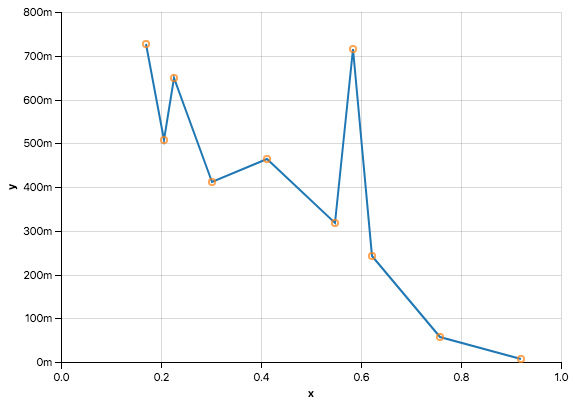

In [11]:
chart2.data = data1

chart2